$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \cA {\mathcal{A}}$
$\def \cD {\mathcal{D}}$
$\def \cM {\mathcal{M}}$
$\def \cN {\mathcal{N}}$
$\def \cW {\mathcal{W}}$
$\def \bc {\mathbf{c}}$
$\def \bu {\mathbf{u}}$
$\def \bv {\mathbf{v}}$
$\def \bw {\mathbf{w}}$
$\def \bq {\mathbf{q}}$
$\def \bA {\mathbf{A}}$
$\def \bG {\mathbf{G}}$
$\def \bC {\mathbf{C}}$
$\def \bD {\mathbf{D}}$
$\def \bI {\mathbf{I}}$
$\def \bP {\mathbf{P}}$
$\def \bQ {\mathbf{Q}}$
$\def \bR {\mathbf{R}}$
$\def \bS {\mathbf{S}}$
$\def \bT {\mathbf{T}}$
$\def \bU {\mathbf{U}}$
$\def \bV {\mathbf{V}}$
$\def \bW {\mathbf{W}}$
$\def \bPhi {\mathbf{\Phi}}$
$\def \bPsi {\mathbf{\Psi}}$
$\def \bGamma {\mathbf{\Gamma}}$
$\def \bSigma {\mathbf{\Sigma}}$
$\def \bTheta {\mathbf{\Theta}}$
$\def \bOmega {\mathbf{\Omega}}$
$\def \bbE {\mathbb{E}}$
$\def \bbP {\mathbb{P}}$
$\def \bbR {\mathbb{R}}$
$\def \bbN {\mathbb{N}}$

## When $\sigma_i = 0$ for $n< i \le K$, $T_{2,2}$ is poorly conditioned and we need a new approach

These tests are in $\bbR^K$ (using the usual $\ell^2$ inner product). We have two orthonormal bases $(\psi_1,\ldots,\psi_K)$ and $(\varphi_1,\ldots,\varphi_K)$, along with the singular values / PCA values of $(\sigma_1,\ldots,\sigma_n,0,\ldots)$, i.e. we assume the PCA comes up short with only $n$ dimensions (or that they are so small they should be truncated, which helps for stability of the final systems).

We assume further that the measurement space $W = \mathrm{span}(\psi_1,\ldots,\psi_m)$ and $W_\perp = \mathrm{span}(\psi_{m+1},\ldots,\psi_K)$, and we write $V = \mathrm{span}(\varphi_1,\ldots,\varphi_n)$.

We have the matrix $\bPhi = [\varphi_1 \ldots \varphi_K]$ and $\bPsi = [\psi_1\,\ldots\,\psi_K]$, where the basis vectors are the columns of the matrices. We write $\bW = [\psi_1\,\ldots\,\psi_m]$, $\bW_\perp = [\psi_{m+1}\,\ldots\,\psi_K]$ and $\bV = [\varphi_{1}\,\ldots\,\varphi_n]$. We have a cross-Grammian $\bG = \bPhi^T \bPsi$.

Now, $\bT = \bG^T \bD^{-1} \bG = \bPsi^T \bPhi \bSigma^{-2} \bPhi^T \bPsi$, the diagonal matrix $\bSigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_n,0\ldots)$. Note also that, using the above notation $\bPsi = \begin{bmatrix} \bW & \bW_\perp \end{bmatrix}$, so in fact

$$ \bS = \begin{bmatrix} \bW^T\bPhi \\ \bW_\perp^T\bPhi \end{bmatrix} \bSigma^{2} \begin{bmatrix} \bPhi^T \bW & \bPhi^T \bW_\perp \end{bmatrix} = \begin{bmatrix} \bW^T \bPhi \bSigma^{2} \bPhi^T \bW & \bW^T \bPhi \bSigma^{2} \bPhi^T \bW_\perp \\ \bW_\perp^T \bPhi \bSigma^{2} \bPhi^T \bW & \bW_\perp^T \bPhi \bSigma^{2} \bPhi^T \bW_\perp \end{bmatrix} $$

and similar for $\bT$ (except with $\bSigma^{-2}$).

which give us the expressions for $\bS_{1,1}$, $\bT_{1,1}$, $\bT_{1,2}$ etc.. The issue here is that $\bS_{1,1}$ or $\bT_{2,2}$ may no longer invertible as 

$$\bS_{1,1} = \bW^T \bPhi \bSigma^{2} \bPhi^T \bW =\bW^T \bV \bSigma_n^{2} \bV^T \bW$$

$$\bT_{2,2} = \bW_\perp^T \bPhi \bSigma^{-2} \bPhi^T \bW_\perp =\bW_\perp^T \bV \bSigma_n^{-2} \bV^T \bW_\perp$$

which are both of rank at most $n$, hence there are stability problems and we must use pseudo-inverses *anyhow*, so we might as well develop an approach that __does not use $W_\perp$__

In [2]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Latex, display

import sys

%matplotlib inline
np.random.seed(1)

In [4]:
K = 100  # The dimensionality of the ambient space (can be up to 2^16 for FEM solutions)
n = K    # The truncation dimension of the PCA / embedding dimension of the manifold 
m = 6    # The dimension off the measurement space

# First make two random orthonormal vector bases
Phi = sp.stats.ortho_group.rvs(dim=K) # The "PCA" space
Psi = sp.stats.ortho_group.rvs(dim=K) # The "measurement" space

sigma = np.sort(np.random.random(n))[::-1]
sigma[n:] = 0
Sigma = np.pad(np.diag(sigma), ((0,K-n),(0,K-n)), 'constant')
Sigma_inv = np.pad(np.diag(1.0/sigma), ((0,K-n),(0,K-n)), 'constant')
Sigma_n = np.diag(sigma)
Sigma_n_inv = np.diag(1.0/sigma)

V = Phi[:,:n]
W = Psi[:,:m]
W_p = Psi[:,m:]

T = Psi.T @ Phi @ Sigma_inv @ Sigma_inv @ Phi.T @ Psi
S = Psi.T @ Phi @ Sigma @ Sigma @ Phi.T @ Psi

### First test (which appears to pass)
Checking that $\bS_{1,1} = \bW^T \bPhi \bSigma^{2} \bPhi^T \bW =\bW^T \bV \bSigma_n^{2} \bV^T \bW$

and $\bT_{2,2} = \bW_\perp^T \bPhi \bSigma^{-2} \bPhi^T \bW_\perp =\bW_\perp^T \bV \bSigma_n^{-2} \bV^T \bW_\perp$, etc...

In [121]:
T21 = T[m:, :m]
T22 = T[m:, m:]
S11 = S[:m, :m]
S21 = S[m:, :m]
S22 = S[m:, m:]

T22_alt = W_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W_p
T21_alt = W_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W
S11_alt = W.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
S22_alt = W_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W_p
S21_alt = W_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W

print('T_21 of shape {0}, rank {1}, condition {2}'.format(T21.shape, np.linalg.matrix_rank(T21), np.linalg.cond(T21)))
print('T_22 of shape {0}, rank {1}, condition {2}\n'.format(T22.shape, np.linalg.matrix_rank(T22), np.linalg.cond(T22)))
print('S_11 of shape {0}, rank {1}, condition {2}'.format(S11.shape, np.linalg.matrix_rank(S11), np.linalg.cond(S11)))
print('S_21 of shape {0}, rank {1}, condition {2}'.format(S21.shape, np.linalg.matrix_rank(S21), np.linalg.cond(S21)))
print('S_22 of shape {0}, rank {1}, condition {2}\n'.format(S22.shape, np.linalg.matrix_rank(S22), np.linalg.cond(S22)))

# Just to check
display(Latex(r'$\left\| \bT_{{2,1}} - \bW_\perp^T \bV \bSigma^{{-2}} \bV^T \bW \right\|_F \
=$ {0}'.format(np.linalg.norm(T21 - T21_alt))))
display(Latex(r'$\left\| \bS_{{1,1}} - \bW^T \bV \bSigma^{{2}} \bV^T \bW \right\|_F \
=$ {0}'.format(np.linalg.norm(S11 - S11_alt))))
display(Latex(r'$\left\| \bS_{{2,1}} - \bW_\perp^T \bV \bSigma^{{2}} \bV^T \bW \right\|_F \
=$ {0}'.format(np.linalg.norm(S21 - S21_alt))))

T_21 of shape (94, 6), rank 6, condition 265.7405087857795
T_22 of shape (94, 94), rank 94, condition 78211.85097360454

S_11 of shape (6, 6), rank 6, condition 1.8115596222028791
S_21 of shape (94, 6), rank 6, condition 1.4118293813471612
S_22 of shape (94, 94), rank 94, condition 2715.7848082715414



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## An investigation in to the pseudo-inverse approach to finding the best estimate

Versus the best linear estimate

In [122]:
def test_meas_pca_pair(K=10, n=7, m=3, deficient=None):
    # First make two random orthonormal vector bases
    Psi = sp.stats.ortho_group.rvs(dim=K) # The "measurement" space

    if deficient:
        Phi = np.eye(K)
        Phi[:-deficient,:-deficient] = sp.stats.ortho_group.rvs(dim=K-deficient) # The "PCA" space
        Phi = Psi @ Phi 
        Phi = Phi[:,::-1] # This basis will have the first #(deficient) columns from W_perp
    else:
        Phi = sp.stats.ortho_group.rvs(dim=K) # The "PCA" space
    
    sigma = np.sort(np.random.random(n))[::-1]
    Sigma = np.pad(np.diag(sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_inv = np.pad(np.diag(1.0/sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_n = np.diag(sigma[:n])
    Sigma_n_inv = np.diag(1.0/sigma[:n])

    V = Phi[:,:n]
    W = Psi[:,:m]
    W_p = Psi[:,m:]

    T = Psi.T @ Phi @ Sigma_inv @ Sigma_inv @ Phi.T @ Psi
    S = Psi.T @ Phi @ Sigma @ Sigma @ Phi.T @ Psi

    u = V @ Sigma_n @ np.random.random(n)

    w = W.T @ u
    w_p = W_p.T @ u

    # Pseudo inverse
    display(Latex(r'Rank$(\bW) =$ {0},  Rank$(\bV) =$ {1},  Rank$(\bW^T \bV) =$ {2}'.format(np.linalg.matrix_rank(W), np.linalg.matrix_rank(V), np.linalg.matrix_rank(W.T @ V))))
    if K <= 10:
        display(Latex(r'$u =$'))
        print(u)
    solver_1 = np.linalg.pinv(W.T @ V @ Sigma_n)
    u_recon_1 = V @ Sigma_n @ solver_1 @ w
    if K <= 10:
        display(Latex(r'$\bV \bSigma \, (\bW^T \bV \bSigma)^\dagger w =$'))
        print(u_recon_1)
    display(Latex(r'$\| u - \bV \bSigma \, (\bW^T \bV \bSigma)^\dagger w \| =$ {0}'.format(np.linalg.norm(u - u_recon_1))))

    # Albert way
    S11 = S[:m, :m]
    S21 = S[m:, :m]
    solver_2 = np.linalg.pinv(S11)
    u_recon_2 = W @ w + W_p @ S21 @ solver_2 @ w
    
    if K <= 10:
        display(Latex(r'$u^* = w + w^* = \bW w + \bW_\perp \bS_{{2,1}} \bS_{{11}}^\dagger w=$'))
        print(u_recon_2)
    display(Latex(r'$\| u - (\bW w + \bW_\perp \bS_{{2,1}} \bS_{{11}}^\dagger w) \| =$ {0}'.format(np.linalg.norm(u - u_recon_2))))
    display(Latex(r'Condition numbers: $\kappa(\bW^T \bV \bSigma) =$ {0}, $\kappa(\bS_{{11}}) =$ {1}'.format(np.linalg.cond(W.T @ V @ Sigma_n), np.linalg.cond(S11)) ))

    soln_diff = np.linalg.norm(u_recon_1 - u_recon_2)
    if np.abs(soln_diff) > 1e-8:
        display(Latex(r'$\color{{red}}{{\| \bV \bSigma \, (\bW^T \bV \bSigma)^\dagger w - (\bW w + \bW_\perp \bS_{{2,1}} \bS_{{11}}^\dagger w) \| = {0}}}$'
                      .format(soln_diff)))
    else:
        display(Latex(r'$\color{{green}}{{\| \bV \bSigma \, (\bW^T \bV \bSigma)^\dagger w - (\bW w + \bW_\perp \bS_{{2,1}} \bS_{{11}}^\dagger w) \| = {0}}}$'
                      .format(soln_diff)))

    
    solver_diff = np.linalg.norm(solver_1.T @ solver_1 - solver_2)
    if np.abs(solver_diff) > 1e-8:
        display(Latex(r'$\color{{red}}{{\| ((\bW^T \bV \bSigma)^\dagger)^T (\bW^T \bV \bSigma)^\dagger - (\bS_{{11}})^\dagger \|_F= {0}}}$'
                      .format(solver_diff)))
    else:
        display(Latex(r'$\color{{green}}{{\| ((\bW^T \bV \bSigma)^\dagger)^T (\bW^T \bV \bSigma)^\dagger - (\bS_{{11}})^\dagger \|_F= {0}}}$'
              .format(solver_diff)))

### Test randomly generated orthonormal bases

Here we make two random orthonormal bases $W_m = \mathrm{span}(\psi_1, \ldots, \psi_m)$ and a PCA basis $V_n = \mathrm{span}(\varphi_1, \ldots, \varphi_n)$ with $\sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_1$. The ambient space is $\bbR^K$ for some $K > m,n$ with usual inner-product.

We generate a random element $u \in V_n$. The matrices $\bW$ and $\bV$ have the vectors $\psi_i$ and $\varphi_j$ as columns respectively. Thus the projection of $u$ to $W_m$ can be computed as $\bW \bW^T u$.

There are two possible reconstructions, the optimal linear one, and the pseudo-inverse one. I'll do some calcs shortly to show. First though we have a look at how the methods fare for a variety of $K, m$ and $n$.

In [123]:
test_meas_pca_pair(K=10, m=2, n=8)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[-0.54299768 -0.09203086  0.53757161  0.05004678  0.14055257 -0.30916112
 -0.01699955  0.19225135  0.55077746 -0.06605054]


<IPython.core.display.Latex object>

[-0.15539074  0.13795915  0.28811881 -0.03557153  0.01111446 -0.25952961
 -0.54112102  0.313814    0.36496915 -0.10550729]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[-0.15539074  0.13795915  0.28811881 -0.03557153  0.01111446 -0.25952961
 -0.54112102  0.313814    0.36496915 -0.10550729]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [124]:
test_meas_pca_pair(K=10, m=7, n=2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[ 0.02521444  0.03338409  0.04677652 -0.06757891 -0.02892373 -0.00992195
 -0.01314839 -0.00869748  0.03184819  0.00633905]


<IPython.core.display.Latex object>

[ 0.02521444  0.03338409  0.04677652 -0.06757891 -0.02892373 -0.00992195
 -0.01314839 -0.00869748  0.03184819  0.00633905]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[ 0.02521444  0.03338409  0.04677652 -0.06757891 -0.02892373 -0.00992195
 -0.01314839 -0.00869748  0.03184819  0.00633905]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [125]:
test_meas_pca_pair(K=100, m=80, n=78)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [126]:
test_meas_pca_pair(K=100, m=30, n=50)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [127]:
test_meas_pca_pair(K=5, m=3, n=2, deficient=1)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[ 0.10569918 -0.27488564  0.14907598 -0.10222085  0.17366614]


<IPython.core.display.Latex object>

[ 0.00992266 -0.14348217 -0.04569568  0.08510529  0.13685033]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[ 0.00992266 -0.14348217 -0.04569568  0.08510529  0.13685033]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# We want to calculate the conditional expectation for the sum, for a particular $w$. This involves looking at the conditional variance

We want to find $\bbE( u \,\big|\, P_W u = w)$. We have the $\bT_{2,2}^{-1}$ formulation, but firstly this doesn't account for $n<N$, and also requires all that $W_\perp$ calculation that I don't think is necessary.

__We consider two different formulations and want to see that they give the same results__

Consider a single cell, where we have the normal distribution 

$$
\cN( u, \bar u, (\varphi_j, \sigma_j^2)) 
= \frac{1}{(2\pi)^{n/2} \prod_{j=1}^n \sigma_j } \exp \left(-\sum_{j=1}^n \frac{\langle u - \bar u, \varphi_j \rangle^2}{2\sigma_j^2} \right) \, \mathrm{d} u
= \frac{1}{(2\pi)^{n/2} \det (\bSigma)} \exp \left(- \frac{1}{2} \| \bSigma^{-1} u \|^2  \right) \, \mathrm{d} u
= \frac{1}{(2\pi)^{n/2}} \exp \left(- \frac{1}{2} \| \tilde u \|^2 \right) \, \mathrm{d} \tilde u.
$$

We abuse notation slightly and use the notation

$$ u_j =\langle u - \bar u, \varphi_j \rangle \quad \text{and}\quad \tilde u_j = \langle u - \bar u, \varphi_j \rangle/\sigma_j$$ 

## The simple substitution approach

As shown earlier, if we have $\bG_W = \bW^T \bV \bSigma$, then
$$
\tilde u^* = \bG_W^\dagger (w - \bar w) \quad \text{and} \quad u^* = \sum_{j=1}^n \tilde u^*_j \sigma_j \varphi_j
$$
as this maximises $\|\tilde u \|^2$ when $\bG_W \tilde u = w - \bar w$. Now, what we want to do here is derive the conditional density, $\cN(\tilde u \, | \, \bG_W \tilde u = w - \bar w)$ which we can do by finding the SVD $\bG_W = \check \bP \check \bGamma \check \bR^T$, where $\check \bGamma$ is diagonal.

So take another coordinate transform 

$$ \tilde u = \check \bR \check u = \begin{bmatrix} \check \bR_W & \check \bR_\perp \end{bmatrix} \begin{bmatrix} \check u_W \\ \check u_\perp \end{bmatrix} = \check \bR_W \check u_W + \check \bR_\perp\check u_\perp
$$

Where $\check \bR_W$ are the first $r=\mathrm{rank}(\bG_W)$ columns, $\check \bR_\perp$ the remaining $(n-r)$ columns. Evidently $\| \tilde u \|^2 = \| \check u \|^2 = \| \check u_W \|^2 + \| \check u_\perp \|^2 $, so Now with any continuous density function we have 
$$
g(x | y) = \frac{g(x,y)}{g(y)}
$$ 
which in this case simply boils down to 
$$
\cN( \check u_\perp | \check u_W ) 
= \frac{(2\pi)^{-n/2} \exp \left(- (\| \check u_\perp \|^2 + \| \check u_W \|^2)/2 \right)}{(2\pi)^{-r/2} \exp \left(-  \| \check u_W \|^2 / 2\right)}
= \frac{1}{(2\pi)^{(n-r)/2}} \exp \left(- \frac{1}{2} \| \check u_\perp \|^2 \right)
$$

which will be important for when we derive the overall conditional expectation for the full Gaussian mixture model later. Finally note that our estimator is

$$
\bG_W \tilde u 
= \bG_W (\check \bR_W \check u_W + \check \bR_\perp\check u_\perp) 
= \check \bP \check \bGamma \check u_W
$$

so the constraint is $P_W u = w$ simply becomes $\check u_W = \check \bGamma^\dagger \check \bP^T (w - \bar w)$




## The less simple, but maybe more rigorous approach

Now we don't do the substitution for $\tilde u$ but remain with the distribution

$$
\frac{1}{(2\pi)^{n/2} \det(\bSigma)} \exp \left(-\frac{1}{2} \| \bSigma^{-1} u \|^2 \right) 
$$

We write $\bQ = w^T \bV$, so that our condition is $\bQ u = w - \bar w$, but the derivation of $u^*$ is not so simple as before. Lets not worry about it for a moment though, instead lets consider the SVD of $\bQ = \hat \bP \hat \bGamma \hat \bR$. Now we do a substitution $u = \hat \bR \hat u$, and observe that

$$
\frac{1}{(2\pi)^{n/2} \det(\bSigma)} \exp \left(-\frac{1}{2} \| \bSigma^{-1} u \|^2 \right) 
= \frac{1}{(2\pi)^{n/2} \det(\bSigma)} \exp \left(-\frac{1}{2} \| \bSigma^{-1} \bR \hat u \|^2 \right) 
= \frac{1}{(2\pi)^{n/2} \det(\bC)^{1/2}} \exp \left(-\frac{1}{2} \langle \hat u, \bC^{-1} \hat u \rangle \right) 
$$

The advantage being we're not changing the Jacobian determinant on the Lebesgue measure, and $\det(\bR^T \bSigma^2 \bR) = \det(\bSigma^2)$ and we define $\bC := \bR^T \bSigma^2 \bR$. Now, once again we write we write $\hat \bR = \begin{bmatrix} \hat \bR_W & \hat \bR_\perp \end{bmatrix}$, and in *this* setting that our condition of $P_W u = w$ becomes 

$$
P_W u = w \iff \bQ u = w - \bar w \iff \bQ \bR_W \hat u = w - \bar w 
\quad \text{hence} \quad \hat u_W = \hat \bGamma^\dagger \hat \bP^T (w - \bar w)
$$

and we write $\bC_{WW} = \bR_W^T \bSigma^2 \bR_W$, $\bC_{\perp\perp} = \bR_\perp^T \bSigma^2 \bR_\perp$,  $\bC_{W\perp} = \bR_W^T \bSigma^2 \bR_\perp$ etc... Now our conditional Gaussian density becomes

$$
\cN( u, \bar u, (\varphi_j, \sigma_j) \, |\, P_W u = w) 
%= \cN( u, 0, \bSigma^2 \, | \, \bQ u = w - \bar w)
= \cN( \hat u, 0, \bC \, | \, \hat u_W = \hat \bGamma^\dagger \hat \bP^T (w - \bar w))
$$

which we can derive using the usual Schur complement formulation

$$
\frac{1}{(2\pi)^{n/2} \det(\bC)^{1/2}} \exp \left(-\frac{1}{2} \langle \hat u, \bC^{-1} \hat u \rangle \right)
= \frac{1}{(2\pi)^{n/2} (\det(\bA)\det(\bC_{WW}))^{1/2}} \exp \left(-\frac{1}{2}\left( \langle (\hat u_\perp - \hat\bq), \bA^{-1} (\hat u_\perp - \hat\bq) \rangle - \langle \hat u_W, \bC_{W W}^{-1} \hat u_W \rangle \right)\right) 
$$

where $\bA = \bC_{\perp\perp} - (\bC_{\perp W} \bC_{W W}^{-1} \bC_{W\perp})^{-1}$ and $\hat \bq = \bC_{\perp W} \bC_{W W}^{-1} \hat u_W$. Hence our conditional distribution is given by

$$
\begin{aligned}
\cN(\hat u_\perp \,| \, \hat u_W) 
& = \frac{\frac{1}{(2\pi)^{n/2} \det(\bC)^{1/2}} \exp \left(-\frac{1}{2} \langle \hat u, \bC^{-1} \hat u \rangle \right)} {\frac{1}{(2\pi)^{r/2} \det(\bC_{WW})^{1/2}} \exp \left(-\frac{1}{2} \langle \hat u_W, \bC_{W W}^{-1} \hat u_W \rangle \right)} \\
& =\frac{1}{(2\pi)^{(n-r)/2} \det(\bA)^{1/2}} \exp \left(-\frac{1}{2} \langle (\hat u_\perp - \hat\bq), \bA^{-1} (\hat u_\perp - \hat\bq) \rangle \right) 
\end{aligned}
$$

One thing to note now is that 
$$
\hat u^* 
= \begin{bmatrix} \hat \bR_W^T  \bQ^\dagger (w - \bar w) \\ \hat\bq \end{bmatrix}
= \begin{bmatrix} \hat \bGamma^\dagger \hat \bP^T (w - \bar w) \\ \hat\bq \end{bmatrix}
= \begin{bmatrix} \hat \bGamma^\dagger \hat \bP^T (w - \bar w) \\ \bC_{\perp W} \bC_{W W}^{-1} \hat \bGamma^\dagger \hat \bP^T (w - \bar w) \end{bmatrix}
$$

### So what quantities should these both give that are the same?

I want to test that they are the same thing. One thing of course is that they give the same conditional expectation, that is

$$
u^* = \hat \bR \hat u^* = \bSigma \tilde u^*
$$

Now also we ideally want the "adjustment" to our distribution to give us something that's easily calculable. I believe we should see that

$$
\frac{1}{(2\pi)^{r/2} \det(\bC_{WW})^{1/2}} \exp \left(-\frac{1}{2} \langle \hat u_W^*, \bC_{W W}^{-1} \hat u_W^* \rangle \right) 
= \frac{1}{(2\pi)^{r/2}} \exp \left(- \frac{1}{2} \| \check u_W^* \|^2 \right)
$$

In [45]:
def tr_svd(M, power=1.0):
    return (np.linalg.svd(M, compute_uv=False)**power).sum()
def det_svd(M, power=1.0):
    return (np.linalg.svd(M, compute_uv=False)).prod()**power

def test_derivations(K=10, n=7, m=3, seed=None):
    if seed:
        np.random.seed(seed)
    # First make two random orthonormal vector bases
    Phi = sp.stats.ortho_group.rvs(dim=K) # The "PCA" space
    Psi = sp.stats.ortho_group.rvs(dim=K) # The "measurement" space

    sigma = np.sort(np.random.random(n))[::-1]
    Sigma = np.pad(np.diag(sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_inv = np.pad(np.diag(1.0/sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_n = np.diag(sigma[:n])
    Sigma_n_inv = np.diag(1.0/sigma[:n])

    V = Phi[:,:n]
    W = Psi[:,:m]
    W_p = Psi[:,m:]

    T = Psi.T @ Phi @ Sigma_inv @ Sigma_inv @ Phi.T @ Psi
    S = Psi.T @ Phi @ Sigma @ Sigma @ Phi.T @ Psi

    u = V @ Sigma_n @ np.random.random(n)

    w = W.T @ u
    w_p = W_p.T @ u
    
    # Pseudo inverse
    Q = W.T @ V @ Sigma_n
    r = np.linalg.matrix_rank(Q)
    P, Gamma, R = np.linalg.svd(Q)
    R_check = R.T
    solver_1 = np.linalg.pinv(Q)
    u_recon_1 = V @ Sigma_n @ solver_1 @ w
    
    C_check = R_check.T @ Sigma_n @ Sigma_n @ R_check
    Cww_check = R_check[:,:r].T @ Sigma_n @ Sigma_n @ R_check[:,:r]
    Cwp_check = R_check[:,:r].T @ Sigma_n @ Sigma_n @ R_check[:,r:]
    Cpp_check = R_check[:,r:].T @ Sigma_n @ Sigma_n @ R_check[:,r:]
    check_uw_star = np.diag(1.0/Gamma) @ P[:,:r].T @ w
    adj_1_exp = np.exp(-0.5 * np.linalg.norm(check_uw_star)**2)
    #adj_1 = adj_1_exp * np.sqrt(np.linalg.det(R_check[:,:r].T @ Sigma_n @ Sigma_n @ R_check[:,:r]) / (2*np.pi)**r)
    adj_1 = adj_1_exp * np.sqrt(np.linalg.det(Cpp_check) / (2*np.pi)**r) / sigma.prod()
    
    real_cov = Gamma.prod()**(-1)
    
    # Alt formulation
    G = W.T @ V
    P, Gamma, R = np.linalg.svd(G)
    r = np.linalg.matrix_rank(G)
    hat_uw_star = np.diag(1.0/Gamma) @ P[:,:r].T @ w #np.linalg.pinv(G) @ w
    R = R.T
    Rw = R[:,:r]; Rp = R[:,r:]
    C = R.T @ Sigma_n @ Sigma_n @ R
    Cww = C[:r,:r]; Cpp = C[r:,r:]; Cwp = C[:r,r:]; Cpw = Cwp.T
    A = Cpp - np.linalg.inv(Cpw @ np.linalg.inv(Cww) @ Cwp)
    q = Cpw @ np.linalg.inv(Cww) @ hat_uw_star
    u_recon_2 = V @ (Rw @ hat_uw_star + Rp @ q)
    
    adj_2_exp = np.exp(-0.5 * hat_uw_star.T @ (np.linalg.inv(Cww) @ hat_uw_star))
    adj_2 = adj_2_exp / np.sqrt(np.linalg.det(Cww)*(2*np.pi)**r)

    # Albert way
    S11 = S[:m, :m]; S21 = S[m:, :m]; S12 = S[:m, m:]; S22 = S[m:, m:]; T22 = T[m:, m:]
    solver_3 = np.linalg.pinv(S11)
    u_recon_3 = W @ w + W_p @ S21 @ solver_3 @ w
    
    adj_3_exp = np.exp(-0.5 * w.T @ (np.linalg.pinv(S11) @ w))
    adj_3 = adj_3_exp / np.sqrt(((2*np.pi)**r * np.linalg.det(S11)))
        
    display(Latex(r'Randomly generated $\psi_j$ and $\varphi_j$ and $u$. Rank$(\bW) =$ {0},  Rank$(\bV) =$ {1},  Rank$(\bG_W) =$ {2}, Rank$(\bQ_W) =$ {3}'
                  .format(np.linalg.matrix_rank(W), np.linalg.matrix_rank(V), np.linalg.matrix_rank(Q), np.linalg.matrix_rank(G)) +
                  r', $\det(\bSigma)^{{-1}}$ = {0}'
                 .format(1.0/sigma.prod())))

    if K <= 10:
        display(Latex(r'$u =$'))
        print(u)
    if K <= 10:
        display(Latex(r'$u^*_1 = \bV \bSigma \widetilde \bu^* = \, \bV \bSigma \bQ^\dagger \bw =$'))
        print(u_recon_1)
    if K <= 10:
        display(Latex(r'$u^*_2 = \bV \bu^* $ ='))
        print(u_recon_2)
    if K <= 10:
        display(Latex(r'$u^*_3 = w + w_\perp^* = \bW \bw + \bW_\perp \bS_{{2,1}} \bS_{{11}}^\dagger \bw=$'))
        print(u_recon_3)

    # Now we want to look at the Adjustment estimate
    #display(Latex(r'$\frac{{1}}{{(2\pi)^{{r/2}}}} \left(\frac{{\det(\check\bR_\perp^T \bSigma^2 \check\bR_\perp)}}{{\det(\bSigma^2)}}\right)^{{1/2}} \exp \left(- \frac{{1}}{{2}} \| \check u_W^* \|^2 \right)$ = {0}'
    #             .format(adj_1)))
    #display(Latex(r'$\frac{{1}}{{(2\pi)^{{r/2}}\det(\bC_{{WW}})^{{1/2}}}} \exp \left(-\frac{{1}}{{2}} \langle \hat u_W^*, \bC_{{WW}}^{{-1}} \hat u_W^* \rangle \right)$ = {0}'
    #             .format(adj_2)))
    #display(Latex(r'$\frac{{1}}{{(2\pi)^{{r/2}} \det(\bS_{{1,1}})^{{1/2}}}} \exp \left(-\frac{{1}}{{2}} \langle w, \bS_{{11}}^{{-1}} w \rangle \right)$ = {0}'
    #             .format(adj_3)))

    display(Latex(r'$\exp \left(- \frac{{1}}{{2}} \| \check u_W^* \|^2 \right)$ = {0:.5e}, '.format(adj_1_exp) +
                  r'$\exp \left(-\frac{{1}}{{2}} \langle \hat u_W^*, \bC_{{WW}}^{{-1}} \hat u_W^* \rangle \right)$ = {0:.5e}, '.format(adj_2_exp) +
                  r'$\exp \left(-\frac{{1}}{{2}} \langle w, \bS_{{11}}^\dagger w \rangle \right)$ = {0:.5e}'.format(adj_3_exp)))
    
    display(Latex(r'$\det(\bGamma^\dagger)^{{2}} $ = {0}, '.format(real_cov)))
    display(Latex(r'$\det(\bS_{{11}})^{{-1/2}} $ = {0}, '
                 .format(1.0/np.sqrt(np.linalg.det(S11))) + 
                  r'$\det(\bS_{{11}}^\dagger)^{{1/2}} $ = {0}'
                 .format(np.sqrt(np.linalg.det(np.linalg.pinv(S11))))))
    
    display(Latex(r'$\det(\bQ^\dagger (\bQ^\dagger)^T)^{{1/2}} $ = {0}, '.format(np.sqrt(np.linalg.det(solver_1 @ solver_1.T))) +
                  r'$\det((\bQ^\dagger)^T \bQ^\dagger)^{{1/2}} $ = {0}'.format(np.sqrt(np.linalg.det(solver_1.T @ solver_1)))))
    
    display(Latex(r'$\det(\bC_{{WW}})^{{-1/2}} $ = {0}'
                 .format(1/np.sqrt(np.linalg.det(Cww)))))
    display(Latex(r'$\det(\check\bR_W^T \bSigma^{{-2}} \check\bR_W)^{{1/2}} $ = {0}'
                 .format(np.sqrt(np.linalg.det(R_check[:,:r].T @ Sigma_n_inv @ Sigma_n_inv @ R_check[:,:r])))))
    display(Latex(r'$\left(\frac{{\det(\check\bR_\perp^T \bSigma^2 \check\bR_\perp)}}{{\det(\bSigma^2)}}\right)^{{1/2}} =$ {0}'
                 .format(np.sqrt(np.linalg.det(Cpp_check))/sigma.prod())))
    display(Latex(r'$\left(\frac{{\det(\bT)}}{{\det(\bT_{{2,2}})}}\right)^{{1/2}} $ = {0}'
                 .format(np.sqrt(np.linalg.det(T)/np.linalg.det(T22)))))


In [46]:
test_derivations(K=5, m=3, n=5)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[-0.35928963 -0.11646024  0.38053699  0.62368205 -0.53899475]


<IPython.core.display.Latex object>

[-0.34911859  0.0730818   0.27143355  0.52486817 -0.48795001]


<IPython.core.display.Latex object>

[-0.34911859  0.0730818   0.27143355  0.52486817 -0.48795001]


<IPython.core.display.Latex object>

[-0.34911859  0.0730818   0.27143355  0.52486817 -0.48795001]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [47]:
test_derivations(K=3, m=1, n=2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[-0.05489757  0.03517034 -0.10257913]


<IPython.core.display.Latex object>

[-0.11760914  0.02918672 -0.00397332]


<IPython.core.display.Latex object>

[-0.11760914  0.02918672 -0.00397332]


<IPython.core.display.Latex object>

[-0.11760914  0.02918672 -0.00397332]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Latex object>

In [49]:
test_derivations(K=3, m=2, n=1)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[ 1.92217915e-01 -4.69129173e-05  1.61820718e-01]


<IPython.core.display.Latex object>

[ 1.92217915e-01 -4.69129173e-05  1.61820718e-01]


<IPython.core.display.Latex object>

[ 1.92217915e-01 -4.69129173e-05  1.61820718e-01]


<IPython.core.display.Latex object>

[ 1.92217915e-01 -4.69129173e-05  1.61820718e-01]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Latex object>

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Latex object>

# We're getting stability issues in production. That is, when the dimension is very high, the singular values get small and things get really unstable. Here's some tests to deal with it.

In [61]:
def tr_svd(M, n, power=1.0):
    return (np.linalg.svd(M, compute_uv=False)**power)[:n].sum()
def det_svd(M, n, power=1.0):
    return (np.linalg.svd(M, compute_uv=False))[:n].prod()**power

def test_stability(K=10, n=7, m=3, seed=None):
    if seed:
        np.random.seed(seed)
    # First make two random orthonormal vector bases
    Phi = sp.stats.ortho_group.rvs(dim=K) # The "PCA" space
    Psi = sp.stats.ortho_group.rvs(dim=K) # The "measurement" space

    sigma = np.sort(np.random.random(n))[::-1]
    Sigma = np.pad(np.diag(sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_inv = np.pad(np.diag(1.0/sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_n = np.diag(sigma[:n])
    Sigma_n_inv = np.diag(1.0/sigma[:n])

    V = Phi[:,:n]
    W = Psi[:,:m]
    W_p = Psi[:,m:]

    T = Psi.T @ Phi @ Sigma_inv @ Sigma_inv @ Phi.T @ Psi
    S = Psi.T @ Phi @ Sigma @ Sigma @ Phi.T @ Psi

    u = V @ Sigma_n @ np.random.random(n)

    w = W.T @ u
    w_p = W_p.T @ u
    
    # Pseudo inverse
    Q = W.T @ V @ Sigma_n
    r = np.linalg.matrix_rank(Q)
    Psi_tilde, Gamma, Phi_tilde = np.linalg.svd(Q)
    Phi_tilde = Phi_tilde.T
    solver_1 = np.linalg.pinv(Q)
    u_recon_1 = V @ Sigma_n @ solver_1 @ w

    check_uw_star = np.diag(1.0/Gamma) @ Psi_tilde[:,:r].T @ w
    adj_1_exp = np.exp(-0.5 * np.linalg.norm(check_uw_star)**2)
    
    real_cov = Gamma.prod()**(-1)
    
    # Albert way
    S11 = S[:m, :m]; S21 = S[m:, :m]; S12 = S[:m, m:]; S22 = S[m:, m:]; T22 = T[m:, m:]
    solver_2 = np.linalg.pinv(S11)
    u_recon_2 = W @ w + W_p @ S21 @ solver_2 @ w
    adj_2_exp = np.exp(-0.5 * w.T @ (np.linalg.pinv(S11) @ w))
    adj_2 = adj_2_exp / np.sqrt(((2*np.pi)**r * np.linalg.det(S11)))
        
    display(Latex(r'Randomly generated $\psi_j$ and $\varphi_j$ and $u$. Rank$(\bW) =$ {0},  Rank$(\bV) =$ {1}, Rank$(\bQ_W) =$ {2}'
                  .format(np.linalg.matrix_rank(W), np.linalg.matrix_rank(V), np.linalg.matrix_rank(Q)) + 
                  r', $\det(\bSigma)^{{-1}}$ = {0}'
                 .format(1.0/sigma.prod())))
        
    display(Latex(r'$\exp \left(-\frac{{1}}{{2}} \| \check u_W^* \|^2 \right)$ = {0:.5e}'.format(adj_1_exp) + '\n' +
                  r'$\exp \left(-\frac{{1}}{{2}} \langle w, \bS_{{11}}^\dagger w \rangle \right)$ = {0:.5e}'.format(adj_2_exp)))
    
    display(Latex(r'$\det(\bGamma^\dagger) $ = {0}, '.format(real_cov)))
    display(Latex(r'$\det(\bS_{{11}}^\dagger)^{{1/2}} $ = {0}, '
                 .format(1.0/np.sqrt(det_svd(S11, n=r)))))
    
    if m > n:
        display(Latex(r'$\det(\bQ^\dagger (\bQ^\dagger)^T)^{{1/2}} $ = {0}, '.format(np.sqrt(np.linalg.det(solver_1 @ solver_1.T)))))
    else:
        display(Latex(r'$\det((\bQ^\dagger)^T \bQ^\dagger)^{{1/2}} $ = {0}'.format(np.sqrt(np.linalg.det(solver_1.T @ solver_1)))))
    
    display(Latex(r'$\left(\frac{{\det(\bS)}}{{\det(\bS_{{1,1}})}}\right)^{{1/2}} $ = {0}'
                 .format(np.sqrt(det_svd(S11, n=r)/det_svd(S, n=n)))))
    display(Latex(r'$\left(\frac{{\det(\bT)}}{{\det(\bT_{{2,2}})}}\right)^{{1/2}} $ = {0}'
                 .format(np.sqrt(det_svd(T, n=n)/det_svd(T22, n=r)))))


In [63]:
test_stability(K=3, m=2, n=1)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [62]:
test_stability(K=300, m=20, n=100)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [1]:
test_stability(K=300, m=200, n=100)

NameError: name 'test_stability' is not defined

# Mean squared error

Should have that MSQ = $\mathrm{trace}(\bT_{2,2}^{-1})$. Lets test alternatives

In [84]:
def test_mse(K=10, n=7, m=3, seed=None):
    if seed:
        np.random.seed(seed)
    # First make two random orthonormal vector bases
    Phi = sp.stats.ortho_group.rvs(dim=K) # The "PCA" space
    Psi = sp.stats.ortho_group.rvs(dim=K) # The "measurement" space

    sigma = np.sort(np.random.random(n))[::-1]
    Sigma = np.pad(np.diag(sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_inv = np.pad(np.diag(1.0/sigma), ((0,K-n),(0,K-n)), 'constant')
    Sigma_n = np.diag(sigma[:n])
    Sigma_n_inv = np.diag(1.0/sigma[:n])

    V = Phi[:,:n]
    W = Psi[:,:m]
    W_p = Psi[:,m:]

    T = Psi.T @ Phi @ Sigma_inv @ Sigma_inv @ Phi.T @ Psi
    S = Psi.T @ Phi @ Sigma @ Sigma @ Phi.T @ Psi

    u = V @ Sigma_n @ np.random.random(n)

    w = W.T @ u
    w_p = W_p.T @ u
    
    # Pseudo inverse
    GW = W.T @ V @ Sigma_n
    r = np.linalg.matrix_rank(GW)
    P, Gamma, R = np.linalg.svd(GW)
    R_check = R.T
    solver_1 = np.linalg.pinv(GW)
    u_recon_1 = V @ Sigma_n @ solver_1 @ w
    
    C_check = R_check.T @ Sigma_n @ Sigma_n @ R_check
    Cww_check = R_check[:,:r].T @ Sigma_n @ Sigma_n @ R_check[:,:r]
    Cwp_check = R_check[:,:r].T @ Sigma_n @ Sigma_n @ R_check[:,r:]
    Cpp_check = R_check[:,r:].T @ Sigma_n @ Sigma_n @ R_check[:,r:]
    
    # Alt formulation
    QW = W.T @ V
    P, Gamma, R = np.linalg.svd(QW)
    r = np.linalg.matrix_rank(QW)
    R = R.T
    Rw = R[:,:r]; Rp = R[:,r:]
    C = R.T @ Sigma_n @ Sigma_n @ R
    Cww = C[:r,:r]; Cpp = C[r:,r:]; Cwp = C[:r,r:]; Cpw = Cwp.T

    # Albert way
    S11 = S[:m, :m]; S21 = S[m:, :m]; S12 = S[:m, m:]; S22 = S[m:, m:]; T22 = T[m:, m:]; T11 = T[:m,:m]; T12 = T[:m,m:]
        
    display(Latex(r'Randomly generated $\psi_j$ and $\varphi_j$ and $u$. Rank$(\bW) =$ {0},  Rank$(\bV) =$ {1},  Rank$(\bG_W) =$ {2}, Rank$(\bQ_W) =$ {3}'
                  .format(np.linalg.matrix_rank(W), np.linalg.matrix_rank(V), np.linalg.matrix_rank(GW), np.linalg.matrix_rank(QW))))

    display(Latex(r'$\mathrm{{trace}}(T_{{2,2}})^{{-1}}$ = {0}'
                 .format(1./np.trace(T22))))
    display(Latex(r'$\mathrm{{trace}}(S_{{2,2}})$ = {0}'
                 .format(np.trace(S22))))

    display(Latex(r'$\mathrm{{trace}}(T_{{1,1}} - T_{{1,2}} T_{{2,2}}^{{-1}} T_{{2,1}})^{{-1}}$ = {0}'
                 .format(1./np.trace(T11 - T12 @ np.linalg.pinv(T22) @ T12.T))))
    display(Latex(r'$\mathrm{{trace}}(\check\bR_W^T \bSigma^{{-2}} \check\bR_W)^{{-1}} $ = {0}'
                 .format(1./np.trace(R_check[:,:r].T @ Sigma_n_inv @ Sigma_n_inv @ R_check[:,:r]))))
    
    
    display(Latex(r'$\mathrm{{trace}}(S_{{2,2}} - S_{{2,1}} S_{{1,1}}^{{-1}} S_{{1,2}})$ = {0}'
                 .format(np.trace(S22 - S12.T @ np.linalg.pinv(S11) @ S12))))
    display(Latex(r'$\mathrm{{trace}}(\check\bR_\perp^T \bSigma^{{2}} \check\bR_\perp) $ = {0}'
                 .format(np.trace(R_check[:,r:].T @ Sigma_n @ Sigma_n @ R_check[:,r:]))))
    

In [85]:
test_mse(K=5, m=3, n=5)
test_mse(K=5, m=5, n=3)
test_mse(K=10, m=3, n=5)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
test_mse(K=5, m=3, n=5)

## Below are earlier computations that I ade out of interest, but are clearly less important than the pseudo-inverse of $\bG_W$ computations that form the central part of this workbook. Also there isn't much justification of what's going on here so feel free to ignore.

Right away above we see several advantages of using $\bS_{1,1}$ to solve the system - the condition number is better in the case of full rank, and the system is only $m\times m$ in size.

### Double checking SVD decompositions and psuedo-inverses

Because both $\bS_{1,1}$ and $\bT_{2,2}$ can be rank difficient if $n < m$ or $n < K-m$ respectively, so we need the pseudo-inverse, $\bS_{1,1}^\dagger$, to solve this system. Let us consider the SVD decomposition of 

$$(\bW^T \bV \bSigma_n) = \bP \bQ \bR \quad\text{giving us}\quad \bS_{1,1} = \bP \bQ \bQ^T \bP^T$$

As is usual, there is a stable inverse for $\bS_{1,1}$ in the span of the columns of $\bP$ up til at most $\min(n, m)$. Let us write that $\bP_{1:r}$ is the matrix made up of the first $r=\min(m,n)$ columns of $\bP$. Psuedo inverse would obv be of the form (assuming, e.g. that the rank of $\bS_{1,1}$ is $n$, and also writing $\bQ^{-2}$ for the appropriate diagonal matrix)

$$\bS^\dagger_{1,1} = \bP_{1:r} \bQ^{-2} (\bP_{1:r})^T$$

Similar calc applies for $\bT_{2,2}$, with the psuedo-inverse applying in the span of the SVD decomp of $(\bW^T \bV \bSigma_n^{-1})$, $\bP_\perp$ up til the $\min(K-m, n)$-th column.

In [21]:
P, Q, RT = sp.linalg.svd(W.T @ V @ Sigma_n)
P_p, Q_p, R_pT = sp.linalg.svd(W_p.T @ V @ Sigma_n_inv)

rm = min(m,n)
rk = min(K-m, n)

T22_pinv = P_p[:,:rk] @ np.diag(1.0/(Q_p*Q_p)) @ P_p[:,:rk].T
S11_pinv = P[:,:rm] @ np.diag(1/(Q*Q)) @ P[:,:rm].T

display(Latex(r'$\left \| \bS_{{1,1}}^\dagger - \bP_{{1:n}} \bQ^{{-2}} (\bP_{{1:n}})^T \right\|_F =$  {0}'.format(np.linalg.norm(S11_pinv - np.linalg.pinv(S11)))))
display(Latex(r'$\left \| \bT_{{2,2}}^\dagger - \bP_{{\perp,1:n}} \bQ_\perp^{{-2}} (\bP_{{\perp,1:n}})^T \right\|_F =$  {0}'.format(np.linalg.norm(T22_pinv - np.linalg.pinv(T22)))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Given the SVD decompositions

$$ (\bW^T \bV \bSigma_n) = \bP \bQ \bR \quad\text{and}\quad(\bW_\perp^T \bV \bSigma_n) = \bP_\perp \bQ_\perp \bR_\perp $$

we find that (again with $r=\min(m,n)$)

\begin{align}
\bS_{2,1} \bS_{1,1}^\dagger 
&= \bP_\perp \bQ_\perp^{-1} \bR_\perp^T \bR \bQ \bP^T 
\bP_{1:r} \bQ^{-2} (\bP_{1:r})^T \\
&= \bP_\perp \bQ_\perp^{-1} \bR_\perp^T \bR_{1:r} \bQ^{-1} (\bP_{1:r})^T \\
\end{align}

$$ \bw_\perp^* = \bS_{2,1} \bS_{1,1}^\dagger \bw = - \bT_{2,2}^\dagger \bT_{2,1} \bw $$

And once again there is a very similar calculation for $\bT_{2,2}^\dagger$.

In [13]:
ra = min(K-m, n)
rm = min(m, n)

P, Q, RT = sp.linalg.svd(W.T @ V @ Sigma_n)
P_p, Q_p, R_pT = sp.linalg.svd(W_p.T @ V @ Sigma_n)
Ssolver_alt = P_p[:,:ra] @ np.diag(Q_p) @ R_pT[:ra] @ RT[:rm].T @ np.diag(1.0/Q) @ P[:,:rm].T
Ssolver = S21 @ np.linalg.pinv(S11)

print('(S21 * S11_inv) shape {0} condition {1}'.format(Ssolver.shape, np.linalg.cond(Ssolver)))
display(Latex(r'$\left\| \bS_{{2,1}} \bS_{{1,1}}^\dagger - (\bP_\perp)_{{1:n}} \bQ_\perp \bR_\perp^T \bR_W \bQ_W^{{-1}} (\bP_W)_{{1:n}}^T \right\|_F =$\
{0}'.format(np.linalg.norm(Ssolver - Ssolver_alt))))

P, Q, RT = sp.linalg.svd(W.T @ V @ Sigma_n_inv)
P_p, Q_p, R_pT = sp.linalg.svd(W_p.T @ V @ Sigma_n_inv)
Tsolver_alt = P_p[:,:ra] @ np.diag(1.0/Q_p) @ R_pT[:ra] @ RT[:rm].T @ np.diag(Q) @ P[:,:rm].T
Tsolver = np.linalg.pinv(T22) @ T21

print('(T22_inv * T21) shape {0} condition {1}'.format(Tsolver.shape, np.linalg.cond(Tsolver)))
display(Latex(r'$\left\| \bT_{{2,2}}^\dagger \bT_{{2,1}} - (\bP_\perp)_{{1:n}} \bQ_\perp^{{-1}} \bR_\perp^T \bR_W \bQ_W (\bP_W)_{{1:n}}^T \right\|_F =$\
{0}'.format(np.linalg.norm(Tsolver - Tsolver_alt))))

display(Latex(r'$\left\| \bS_{{2,1}} \bS_{{1,1}}^\dagger + \bT_{{2,2}}^\dagger \bT_{{2,1}} \right\|_F =$ \
{0}'.format(np.linalg.norm(Tsolver + Ssolver))))

(S21 * S11_inv) shape (94, 6) condition 1.7075450222771817


<IPython.core.display.Latex object>

(T22_inv * T21) shape (94, 6) condition 1.7075450222783881


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
print('That other thing Ive been semi hopeful for : {0}'.format(np.linalg.norm(Ssolver - Q.T @ P[:,:n].T)))

That other thing Ive been semi hopeful for : 862.1173900020692


### So what are we actually getting to here? 

Well, the complexity of the SVD for really large $K$ is just stupendous. We want to consider maybe something like restrict $\bbR^K$ to $\bbR^{2m}$ spanned by $\psi_1,\ldots,\psi_{2m}$ to do this reconstruction, and we know that we'll have it within some amount...

In this case we simply have the "approximate" operators 

$$ \bT_{2,2}^{(\mathrm{app})} = (\bPsi_{m:2m})^T \bV \bSigma^{-2} \bV^T \bPsi_{m:2m} $$

and 

$$ \bT_{2,1}^{(\mathrm{app})} = \bPsi_{m:2m}^T \bV \bSigma^{-2} \bV^T \bPsi_{1:m} = \bPsi_{m:2m}^T \bV \bSigma^{-2} \bV^T \bW . $$ 

We see below we have much more manageable computations $\bT_{2,2}^{(\mathrm{app})}$ is now of shape $m \times m$.

In [15]:
W2_p = Psi[:,m:2*m]

S11_approx = W.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
S21_approx = W2_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
print('S_11_approx of shape {0}, rank {1}, condition {2}'.format(S11_approx.shape, np.linalg.matrix_rank(S11_approx), np.linalg.cond(S11_approx)))
print('S_21_approx of shape {0}, rank {1}, condition {2}'.format(S21_approx.shape, np.linalg.matrix_rank(S21_approx), np.linalg.cond(S21_approx)))
Ssolver_approx = S21_approx @ np.linalg.pinv(S11_approx)

T22_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W2_p
T21_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W
print('T_21_approx of shape {0}, rank {1}, condition {2}'.format(T21_approx.shape, np.linalg.matrix_rank(T21_approx), np.linalg.cond(T21_approx)))
print('T_22_approx of shape {0}, rank {1}, condition {2}'.format(T22_approx.shape, np.linalg.matrix_rank(T22_approx), np.linalg.cond(T22_approx)))
Tsolver_approx = np.linalg.pinv(T22_approx) @ T21_approx

print('')
display(Latex(r'$\left\| \bS_{{2,1}} \bS_{{1,1}}^\dagger - \bS_{{2,1}}^{{(\mathrm{{app}})}} (\bS_{{1,1}}^{{(\mathrm{{app}})}})^\dagger \right\|_2 =$ \
{0}'.format(np.linalg.norm(W2_p @ Ssolver_approx - W_p @ Ssolver, ord=2))))
display(Latex(r'$\left\| \bT_{{2,2}}^\dagger \bT_{{2,1}} - (\bT_{{2,2}}^{{(\mathrm{{app}})}})^\dagger \bT_{{2,1}}^{{(\mathrm{{app}})}} \right\|_2 =$ \
{0}'.format(np.linalg.norm(W2_p @ Tsolver_approx - W_p @ Tsolver, ord=2))))

S_11_approx of shape (6, 6), rank 6, condition 1.8115596222028805
S_21_approx of shape (6, 6), rank 6, condition 36.3483297743399
T_21_approx of shape (6, 6), rank 6, condition 816.7160304546929
T_22_approx of shape (6, 6), rank 6, condition 320.4698990310355



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Now we examine the approximation difference from $m+1$ to $K$

...i.e. we take $\bW_\perp = \bPsi_{m:M}$ for $M = m+1, \ldots , K$

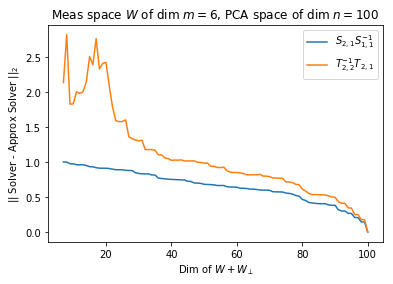

In [16]:
Ssolver_acc = np.zeros(K-m)
Tsolver_acc = np.zeros(K-m)

for M in range(m+1,K):
    
    W2_p = Psi[:,m:M]
    S11_approx = W.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
    S21_approx = W2_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
    T22_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W2_p
    T21_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W

    Ssolver_approx = S21_approx @ np.linalg.pinv(S11_approx)
    Tsolver_approx = np.linalg.pinv(T22_approx) @ T21_approx

    Ssolver_acc[M-(m+1)] = np.linalg.norm(W2_p @ Ssolver_approx - W_p @ Ssolver, ord=2)
    Tsolver_acc[M-(m+1)] = np.linalg.norm(W2_p @ Tsolver_approx - W_p @ Tsolver, ord=2)

plt.figure(figsize=(6, 4))
plt.plot(range(m+1, K+1), Ssolver_acc, label=r'$S_{2,1} S_{1,1}^{-1}$')
plt.plot(range(m+1, K+1), Tsolver_acc, label=r'$T_{2,2}^{-1} T_{2,1}$')
plt.legend(loc=1)
plt.xlabel(r'Dim of $W + W_\perp$')
plt.ylabel(r'$||$ Solver - Approx Solver $||_2$')
plt.title(r'Meas space $W$ of dim $m=${0}, PCA space of dim $n=${1}'.format(m,n))
plt.savefig('blah.jpg')
plt.show()
